In [8]:
from ipaddress import summarize_address_range
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Mouse gastrulation
import scanpy
adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')

In [10]:
paper_stage=set(adata_paper.obs.stage)
paper_celltype=set(adata_paper.obs.celltype)
print(paper_stage)
print(paper_celltype)

{'E8.25', 'E8.5', 'E7.0', 'E7.75', 'E8.0', 'E6.5', 'E7.5', 'E7.25', 'E6.75'}
{'Nascent mesoderm', 'Mesenchyme', 'Erythroid2', 'Gut', 'Erythroid1', 'Visceral endoderm', 'Intermediate mesoderm', 'Anterior Primitive Streak', 'ExE mesoderm', 'Caudal Mesoderm', 'Erythroid3', 'Neural crest', 'Blood progenitors 1', 'Blood progenitors 2', 'Notochord', 'PGC', 'Rostral neurectoderm', 'Somitic mesoderm', 'Surface ectoderm', 'NMP', 'Pharyngeal mesoderm', 'Paraxial mesoderm', 'Primitive Streak', 'Spinal cord', 'Mixed mesoderm', 'Caudal epiblast', 'Haematoendothelial progenitors', 'Caudal neurectoderm', 'Def. endoderm', 'Epiblast', 'Forebrain/Midbrain/Hindbrain', 'Allantois', 'Cardiomyocytes', 'Endothelium'}


In [11]:
import scvelo as scv
from utilities import adata_to_raw
import anndata


In [12]:
# gastrulation all data 
import scanpy
import scvelo as scv

adata_paper =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/gastrulation.h5ad')
adata_paper_bkup=adata_paper.copy()

In [13]:
adata_paper

AnnData object with n_obs × n_vars = 89267 × 53801
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [14]:
adata_paper.obs

,barcode,sample,stage,sequencing.batch,theiler,doub.density,doublet,cluster,cluster.sub,cluster.stage,...,haem_subclust,endo_gephiX,endo_gephiY,endo_trajectoryName,endo_trajectoryDPT,endo_gutX,endo_gutY,endo_gutDPT,endo_gutCluster,cell_velocyto_loom
index,,,,,,,,,,,,,,,,,,,,,
cell_1,AAAGGCCTCCACAA,1,E6.5,1,TS9,0.043114,False,2.0,4.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AAAGGCCTCCACAAx
cell_2,AACAAACTCGCCTT,1,E6.5,1,TS9,1.129713,False,12.0,1.0,1.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACAAACTCGCCTTx
cell_6,AACATATGAATCGC,1,E6.5,1,TS9,1.254709,False,1.0,1.0,3.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACATATGAATCGCx
cell_8,AACCGATGGCTTCC,1,E6.5,1,TS9,1.345759,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACCGATGGCTTCCx
cell_9,AACGTGTGCTCTAT,1,E6.5,1,TS9,1.146369,False,2.0,1.0,2.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_7SUA3:AACGTGTGCTCTATx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_139326,TTTCGAACGGTGAG,37,E8.5,3,TS12,0.476074,False,18.0,2.0,19.0,...,Ery4,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCGAACGGTGAGx
cell_139327,TTTCGAACTAACCG,37,E8.5,3,TS12,0.303505,False,18.0,2.0,19.0,...,Ery4,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCGAACTAACCGx
cell_139329,TTTCTACTGGGATG,37,E8.5,3,TS12,0.344835,False,13.0,2.0,18.0,...,nan,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,possorted_genome_bam_DRLGW:TTTCTACTGGGATGx


In [15]:
# early_endoderm
stage_endo_blood=['E8.25', 'E8.5', 'E7.0', 'E7.75', 'E8.0', 'E6.5', 'E7.5', 'E7.25', 'E6.75']
celltype_endo_blood=['Anterior Primitive Streak','Def. endoderm','Gut','Visceral endoderm']

Index(['Sox17', 'Arfgef1', 'Cpa6', 'Tram1', 'Eya1', 'Mcm3', 'Ogfrl1', 'Phf3',
       'Bag2', 'Fhl2',
       ...
       'Wnk3', 'Acot9', 'Rbbp7', 'Pir', 'Gpm6b', 'Gm21887', 'Uty', 'Ddx3y',
       'Eif2s3y', 'Gm47283'],
      dtype='object', name='index', length=2000)

saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/CLUSTER.pdf


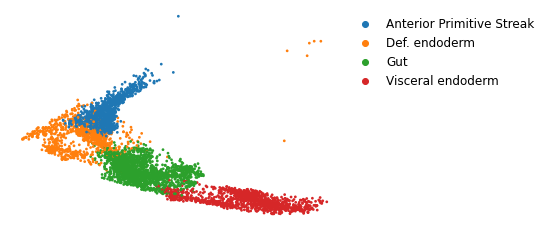

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Sox17.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Arfgef1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Cpa6.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Tram1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Eya1.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/Mcm3.pdf
saving figure to file /Users/wanglab/Documents/ShengyuLi/Velocity

In [33]:
# adata_paper_endo_blood=adata_paper[adata_paper.obs.stage.isin(stage_endo_blood) & adata_paper.obs.celltype.isin(celltype_endo_blood),:].copy()
# adata_paper_endo_blood.var_names # 53801 genes
# adata_paper_endo_blood.obs_names # 5066 cells
savedir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/early_endodrem/scatter_s0_u0/'


scv.pl.scatter(adata_paper_endo_blood, c='celltype', s=30, legend_align_text=True, legend_fontsize=12, title='',save=savedir+'CLUSTER'+'.pdf')
# scv.pp.filter_and_normalize(adata_paper_endo_blood, min_shared_counts=30, n_top_genes=2000)

gene_list=adata_paper_endo_blood.var_names

n_list=[200]
for n in n_list:
    scv.pp.moments(adata_paper_endo_blood,n_neighbors=n)
    for gene in gene_list:
        scv.pl.scatter(adata_paper_endo_blood, basis=gene, c='celltype', vkey='velocity', frameon='artist', s=40, dpi=80,show=False,save=savedir+gene+'.pdf')


# for n in n_list:
#     scv.pp.moments(adata_paper_endo_blood,n_neighbors=n)
#     # scv.tl.velocity(adata_paper_endo_blood)
#     print(adata_paper_endo_blood.var_names)
#     # for gene in adata_paper_endo_blood.var_names[30:50]:
#     for gene in adata_paper_endo_blood.var_names[30:50]:
#         adata_onegene=adata_paper_endo_blood[:,adata_paper_endo_blood.var.index.isin([gene])].copy()

#         s0_onegene = adata_onegene.layers['Ms'].T[0]
#         u0_onegene = adata_onegene.layers['Mu'].T[0]

#         plt.figure()
#         plt.title('n'+str(n)+"_"+gene)
#         plt.scatter(s0_onegene,u0_onegene,alpha=0.3)

In [16]:
# adata_paper_endo_blood adata to raw (using 20 to 25 # del 'Endothelium'(green))

In [17]:
adata_paper_endo_blood

AnnData object with n_obs × n_vars = 12329 × 2000
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [18]:
# from utilities import adata_to_raw_with_embed
def adata_to_raw_with_embed(adata,save_path,gene_list=None):
    '''convert adata to raw data format with embedding info
    data:
    save_path:
    gene_list (optional):

    return: panda dataframe with gene_list,u0,s0,cellID,clusters,embedding1,embedding2
    
    run: test=adata_to_raw(adata,'/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer-development_20220128/src/output/test.csv',gene_list=genelist_all)
    ref: mel - loom_to_celldancer_raw.py
    '''
    def adata_to_raw_one_gene(data, para, gene):
        '''
        convert adata to raw data format (one gene)
        data: an anndata
        para: the varable name of u0, s0, and gene name
        para = ['Mu', 'Ms']
        '''
        data2 = data[:, data.var.index.isin([gene])].copy()
        u0 = data2.layers[para[0]][:,0].copy().astype(np.float32)
        s0 = data2.layers[para[1]][:,0].copy().astype(np.float32)
        raw_data = pd.DataFrame({'gene_list':gene, 'u0':u0, 's0':s0})
        return(raw_data)

    if gene_list is None: gene_list=adata.var.index

    for i,gene in enumerate(gene_list):
        print("processing:"+str(i)+"/"+str(len(adata.var_names)))
        data_onegene = adata_to_raw_one_gene(adata, para=['Mu', 'Ms'], gene=gene)
        if i==0:
            data_onegene.to_csv(save_path,header=True,index=False)
        else:
            data_onegene.to_csv(save_path,mode='a',header=False,index=False)
    
    # cell info
    gene_num=len(gene_list)
    cellID=pd.DataFrame({'cellID':adata.obs.index})
    celltype_meta=adata.obs['celltype'].reset_index(drop=True)
    celltype=pd.DataFrame({'clusters':celltype_meta})#
    embed_map=pd.DataFrame({'embedding1':adata.obsm['X_umap'][:,0],'embedding2':adata.obsm['X_umap'][:,1]})
    # embed_info_df = pd.concat([embed_info]*gene_num)
    embed_info=pd.concat([cellID,celltype,embed_map],axis=1)
    embed_raw=pd.concat([embed_info]*gene_num)
    embed_raw=embed_raw.reset_index(drop=True)
    
    raw_data=pd.read_csv(save_path)
    raw_data=pd.concat([raw_data,embed_raw],axis=1)
    
    raw_data.to_csv(save_path,header=True,index=False)

    return(raw_data)

In [21]:
import numpy as np
import pandas as pd
# gene_list=['Sox17', '2410006H16Rik', 'Smim1', 'Hba-x', 'Abi3', 'Akap12', 'Car4', 'Degs1','Dhrs11','Fn1','Grb10','H2afv','Hba-a1','Hspd1','Hspe1','Igf1','Igf2bp1','Klf7','Sgk3','Slc4a1','Tagln2','Timp3','Tns3','Tpd52l1','Ube2d1','Ugp2']
# raw=adata_to_raw_with_embed(adata_paper_endo_blood,save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25.csv',gene_list=gene_list)
raw=adata_to_raw_with_embed(adata_paper_endo_blood,save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes.csv')
raw

processing:0/2000
processing:1/2000
processing:2/2000
processing:3/2000
processing:4/2000
processing:5/2000
processing:6/2000
processing:7/2000
processing:8/2000
processing:9/2000
processing:10/2000
processing:11/2000
processing:12/2000
processing:13/2000
processing:14/2000
processing:15/2000
processing:16/2000
processing:17/2000
processing:18/2000
processing:19/2000
processing:20/2000
processing:21/2000
processing:22/2000
processing:23/2000
processing:24/2000
processing:25/2000
processing:26/2000
processing:27/2000
processing:28/2000
processing:29/2000
processing:30/2000
processing:31/2000
processing:32/2000
processing:33/2000
processing:34/2000
processing:35/2000
processing:36/2000
processing:37/2000
processing:38/2000
processing:39/2000
processing:40/2000
processing:41/2000
processing:42/2000
processing:43/2000
processing:44/2000
processing:45/2000
processing:46/2000
processing:47/2000
processing:48/2000
processing:49/2000
processing:50/2000
processing:51/2000
processing:52/2000
pro

,gene_list,u0,s0,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880
